<a href="https://colab.research.google.com/github/tsnzzhr/AirQualityUCI_Kmeans/blob/main/4_Cluster_KMeans_AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
air_quality = pd.read_csv("AirQualityUCI.csv")
air_quality


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


In [ ]:
air_quality.shape
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [ ]:
aq = air_quality.drop(['Date','Time'], axis=1)
aq.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [ ]:
aq.shape
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   int64  
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   int64  
 5   NOx(GT)        9357 non-null   int64  
 6   PT08.S3(NOx)   9357 non-null   int64  
 7   NO2(GT)        9357 non-null   int64  
 8   PT08.S4(NO2)   9357 non-null   int64  
 9   PT08.S5(O3)    9357 non-null   int64  
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 950.4 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = aq.values[:,1:]
print(X)
X = np.nan_to_num(X)
print(X)
clustered = StandardScaler().fit_transform(X)
clustered

[[ 1.360e+03  1.500e+02  1.190e+01 ...  1.360e+01  4.890e+01  7.578e-01]
 [ 1.292e+03  1.120e+02  9.400e+00 ...  1.330e+01  4.770e+01  7.255e-01]
 [ 1.402e+03  8.800e+01  9.000e+00 ...  1.190e+01  5.400e+01  7.502e-01]
 ...
 [ 1.142e+03 -2.000e+02  1.240e+01 ...  2.690e+01  1.830e+01  6.406e-01]
 [ 1.003e+03 -2.000e+02  9.500e+00 ...  2.830e+01  1.350e+01  5.139e-01]
 [ 1.071e+03 -2.000e+02  1.190e+01 ...  2.850e+01  1.310e+01  5.028e-01]]
[[ 1.360e+03  1.500e+02  1.190e+01 ...  1.360e+01  4.890e+01  7.578e-01]
 [ 1.292e+03  1.120e+02  9.400e+00 ...  1.330e+01  4.770e+01  7.255e-01]
 [ 1.402e+03  8.800e+01  9.000e+00 ...  1.190e+01  5.400e+01  7.502e-01]
 ...
 [ 1.142e+03 -2.000e+02  1.240e+01 ...  2.690e+01  1.830e+01  6.406e-01]
 [ 1.003e+03 -2.000e+02  9.500e+00 ...  2.830e+01  1.350e+01  5.139e-01]
 [ 1.071e+03 -2.000e+02  1.190e+01 ...  2.850e+01  1.310e+01  5.028e-01]]


array([[ 0.94298276,  2.21123554,  0.24250369, ...,  0.08846247,
         0.18383116,  0.19488093],
       [ 0.73680662,  1.93938293,  0.1820851 , ...,  0.08151824,
         0.16039979,  0.19405218],
       [ 1.07032685,  1.76768654,  0.17241813, ...,  0.04911182,
         0.28341445,  0.19468593],
       ...,
       [ 0.28200632, -0.29267014,  0.25458741, ...,  0.39632347,
        -0.41366862,  0.19187384],
       [-0.13944196, -0.29267014,  0.18450185, ...,  0.4287299 ,
        -0.50739408,  0.188623  ],
       [ 0.06673418, -0.29267014,  0.24250369, ...,  0.43335938,
        -0.51520453,  0.1883382 ]])

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 3 3 ... 3 3 3]


In [ ]:
silhouette_score(X, labels)

0.3045590542338009

In [ ]:
aq["cluster_aq"] = labels
aq.head(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,cluster_aq
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,3
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,3
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,3
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,3
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,3


In [ ]:
aq.groupby('cluster_aq')['cluster_aq'].count()



cluster_aq
0    3126
1    1934
2     366
3    3931
Name: cluster_aq, dtype: int64

In [ ]:
aq.groupby('cluster_aq').mean()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
cluster_aq,,,,,,,,,,,,,
0,-44.190467,898.158029,-173.674024,3.610621,676.833333,32.786308,1084.983365,9.534229,1180.796865,649.238964,15.648816,49.620122,0.896743
1,-18.496019,1413.921923,-119.503619,21.117528,1316.922958,419.011892,561.476732,122.131851,1826.241468,1602.308687,18.688004,51.982937,1.104027
2,-17.268852,-200.000000,-168.609290,-200.000000,-200.000000,288.297814,-200.000000,94.562842,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
3,-35.575859,1105.681252,-166.082422,9.801348,961.897227,142.297889,771.907657,61.938947,1493.297634,1034.994403,20.258153,47.574968,1.089325


In [ ]:
set(X[:, 1])

{-200.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 14.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 1

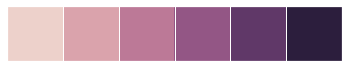

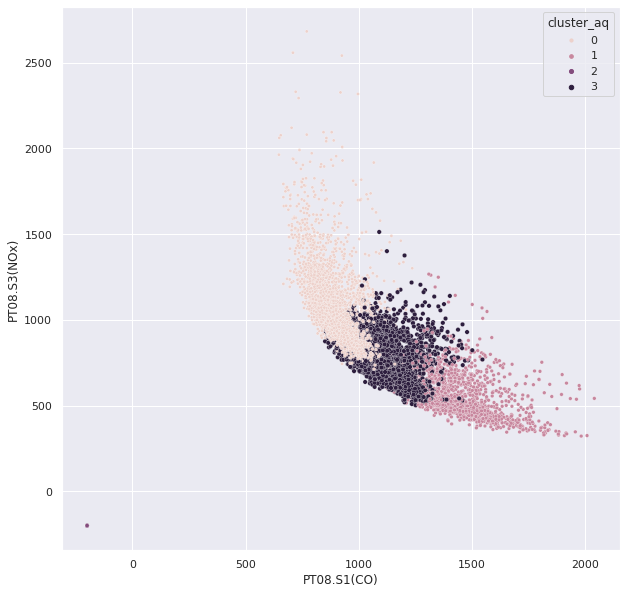

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")
sns.set_theme()
sns.palplot(sns.cubehelix_palette())
plt.figure(figsize=(10, 10))
sns.scatterplot(data=aq, x="PT08.S1(CO)", y="PT08.S3(NOx)", hue='cluster_aq', size= 'cluster_aq', sizes=(10,20))

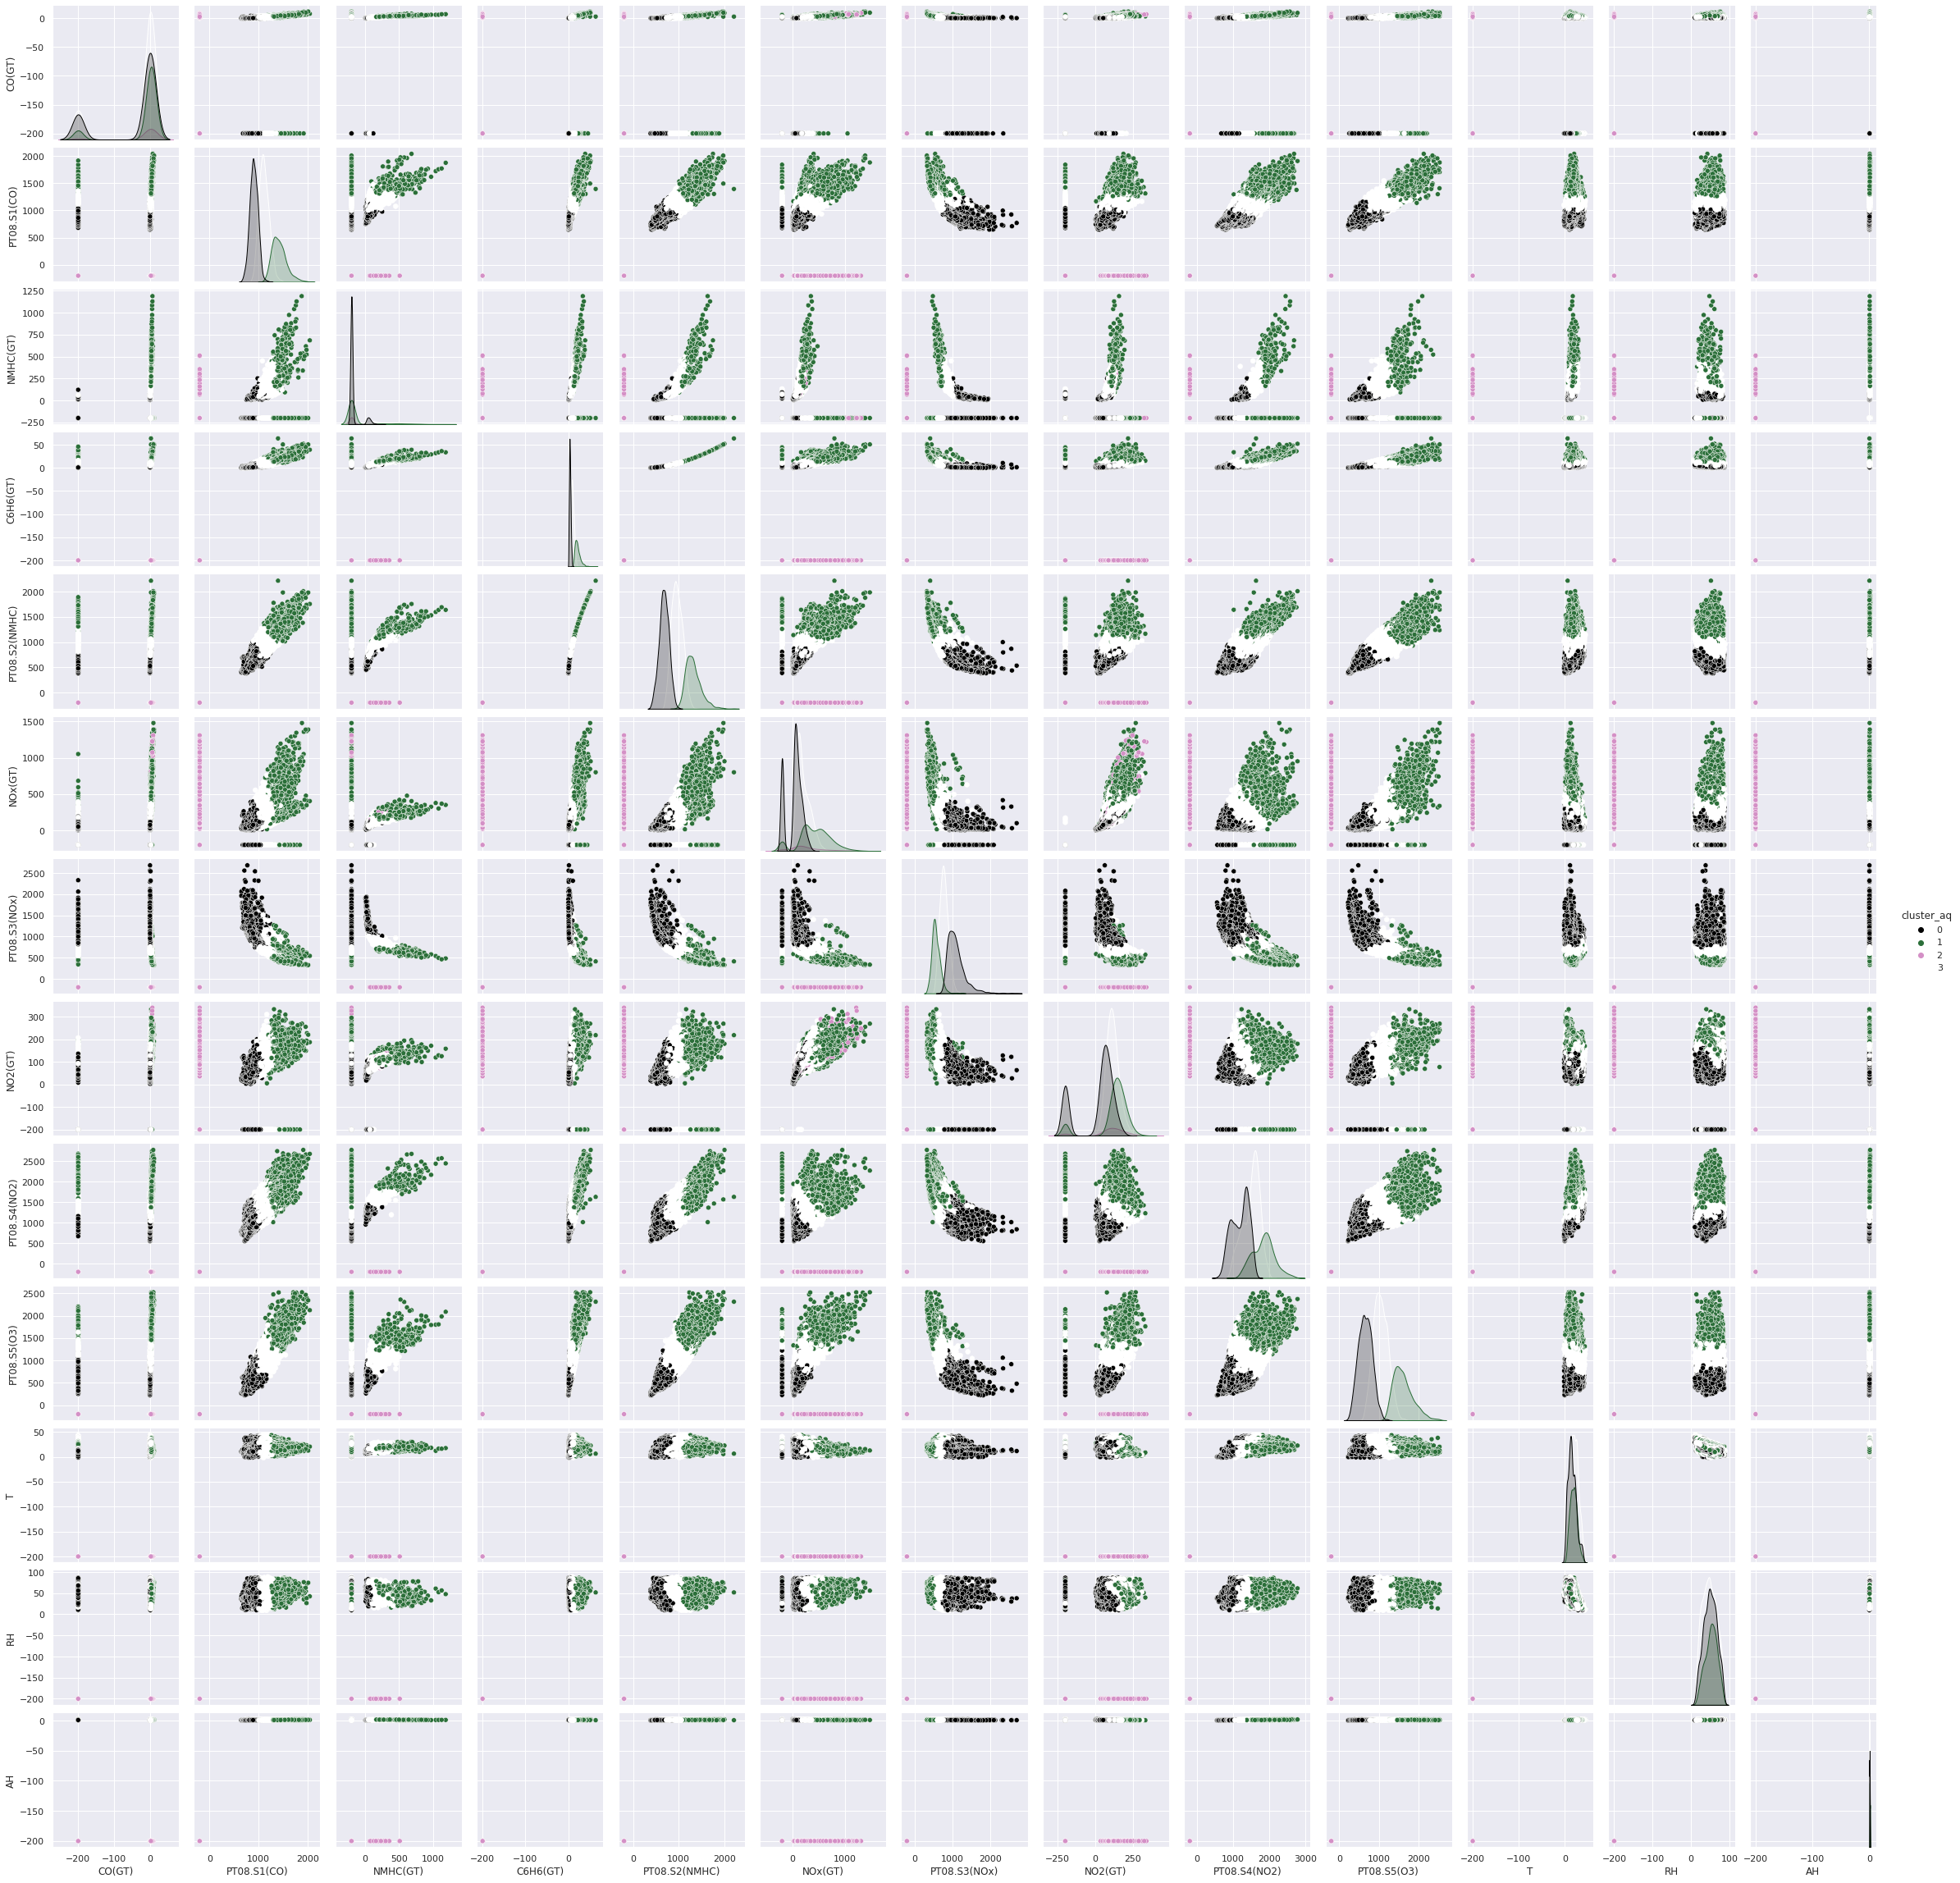

In [ ]:
import seaborn as sns

sns.pairplot(aq,hue='cluster_aq')

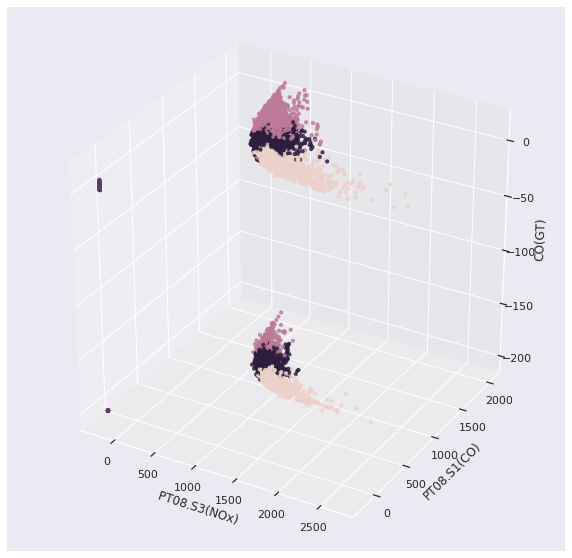

In [ ]:
from matplotlib.colors import ListedColormap 
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
cmap = ListedColormap(sns.cubehelix_palette().as_hex())

y = aq['PT08.S1(CO)']
z = aq['CO(GT)']
x = aq['PT08.S3(NOx)']

ax.set_xlabel("PT08.S3(NOx) ")
ax.set_ylabel("PT08.S1(CO)")
ax.set_zlabel("CO(GT)")

ax.scatter(x, y, z, alpha=0.8, c= labels.astype(np.float64), cmap=cmap, marker="o", s=10)
